P-value for Random Forest vs SVM: 0.0002961522700452354
P-value for Random Forest vs Logistic Regression: 0.0027856183135524255
P-value for Random Forest vs Decision Tree: 0.003304394074522585
P-value for SVM vs Logistic Regression: 0.00042009485006459595
P-value for SVM vs Decision Tree: 0.00027634985948454534
P-value for Logistic Regression vs Decision Tree: 0.03277166790018237


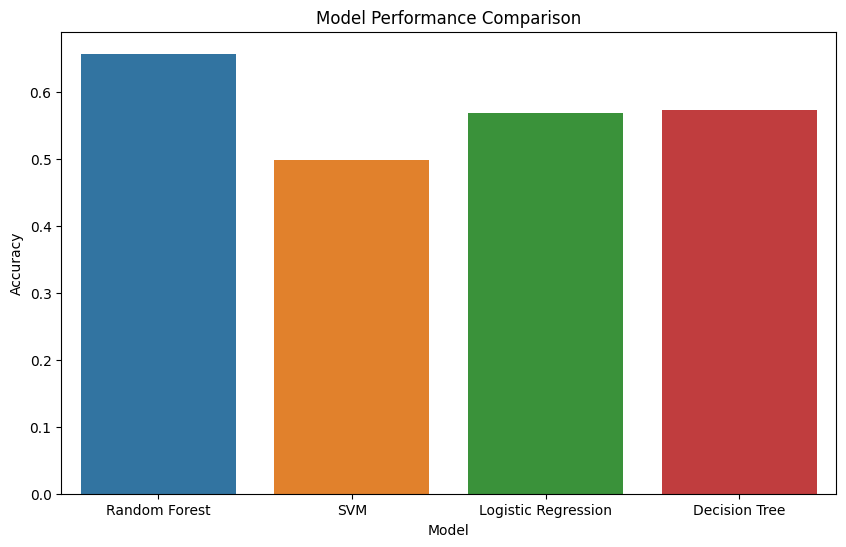

Best Models: ['Random Forest', 'SVM', 'Logistic Regression', 'Decision Tree']


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn.exceptions import ConvergenceWarning
import warnings

# Importing Data
data = pd.read_csv('wineq.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = [
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier())
]

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

results = {}
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores


final_scores = {}
for name, model in models:
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    final_scores[name] = accuracy


for i in range(len(models) - 1):
    for j in range(i + 1, len(models)):
        model1 = models[i][0]
        model2 = models[j][0]
        _, p_value = stats.ttest_rel(results[model1], results[model2])
        print(f"P-value for {model1} vs {model2}: {p_value}")


plt.figure(figsize=(10, 6))
df_results = pd.DataFrame(results)
sns.barplot(data=df_results.mean().reset_index(), x='index', y=0)
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

best_models = [name for name, _ in models if p_value < 0.05]  # Assuming a significance level of 0.05
print("Best Models:", best_models)
